In [1]:
import matplotlib.pyplot as plt
import matplotlib
import os, os.path
import glob
from numpy import *
import theano
from PIL import Image 
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import numpy as np
import cv2
import tensorflow as tf
import pandas as pd

WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.
2022-12-12 16:02:53.216153: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [1]:
path2 = 'training_resized'

path2_test = 'testing_resized'

In [5]:
imlist = os.listdir(path2)
imlist_test = os.listdir(path2_test)

In [6]:
im1 = array(Image.open(path2 + '/' + imlist[0]))
m,n = im1.shape[0:2]
imnbr = len(imlist)

im_test = array(Image.open(path2_test + '/' + imlist_test[0]))
m_t,n_t = im_test.shape[0:2]
imnbr_t = len(imlist_test)

In [ ]:
#training processing 

In [7]:
imlist.sort()

In [8]:
label=[]

for x in imlist:
    if "BA" in x:
        label.append(0)
    elif "EO" in x:
        label.append(1)
    elif "ERB" in x:
        label.append(2)
    elif "LY" in x:
        label.append(3)
    elif "MMY" in x:
        label.append(4)
    elif "MO" in x:
        label.append(5)
    elif "BNE" in x:
        label.append(7)
    elif "SNE" in x:
        label.append(8)
    elif "PMY" in x:
        label.append(9)
    else:
        label.append(6)

In [9]:
Label = np.array(label)

In [158]:
immatrix = []

for x in imlist:
    image = cv2.imread("training_resized/" +x)
    resized = cv2.resize(image, (50,50) , interpolation = cv2.INTER_AREA)
    image_gray = cv2.cvtColor(resized, cv2.COLOR_BGR2GRAY)
    immatrix.append(image_gray)

In [159]:
Immatrix = np.array(immatrix)

In [161]:
train_images,train_labels = shuffle(Immatrix, Label, random_state=2)

In [ ]:
#testing processing 

In [13]:
imlist_test.sort()

In [153]:
immatrix_test = []

for x in imlist_test:
    image_test = cv2.imread("testing_resized/" +x)
    resized_test = cv2.resize(image_test, (50,50) , interpolation = cv2.INTER_AREA)
    image_gray_test = cv2.cvtColor(resized_test, cv2.COLOR_BGR2GRAY)
    immatrix_test.append(image_gray_test)

In [154]:
Immatrix_test = np.array(immatrix_test)

In [127]:
df = pd.read_csv("test_label.csv")
labels_test = df.label_id.values.tolist()

In [129]:
Labels_test = np.array(labels_test)

In [156]:
test_images,test_labels = shuffle(Immatrix_test, Labels_test, random_state=2)

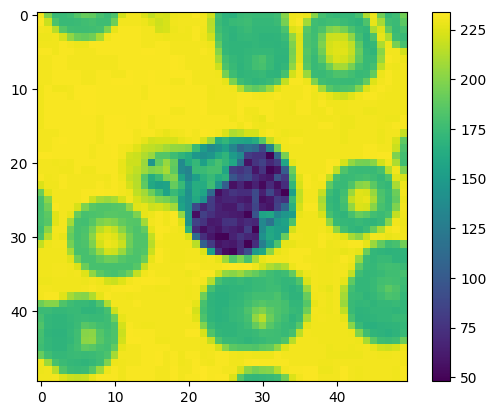

In [157]:
plt.figure()
plt.imshow(test_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [162]:
train_images = train_images / 255.0

test_images = test_images / 255.0

In [22]:
class_names = ["Basophil", "Eosinophil", "Erythroblast", "Lymphocyte", "Metamyelocyte", "Monocyte", "Myelocyte", "Neutrophil_banded", "Neutrophil_segmented", "Promyelocyte"]

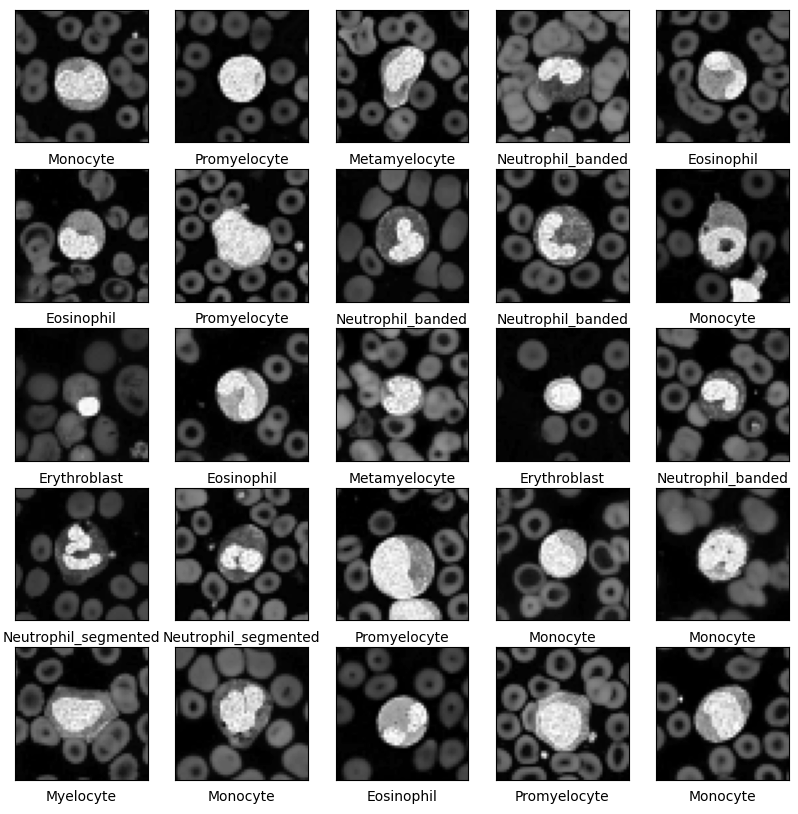

In [163]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

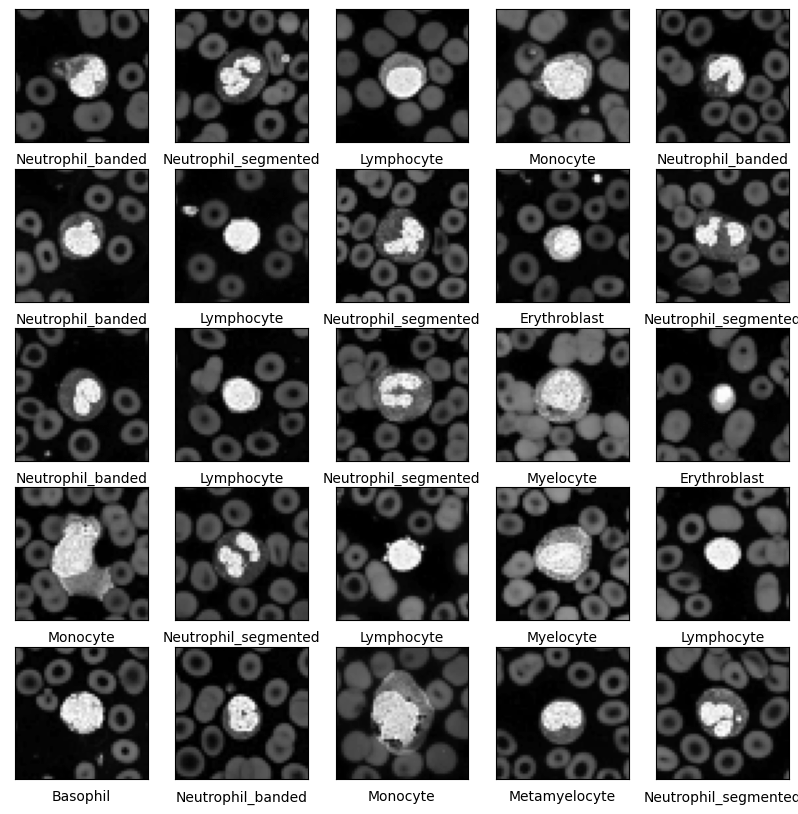

In [164]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[test_labels[i]])
plt.show()

In [ ]:
#Building the model

In [354]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(50, 50)),
    tf.keras.layers.Dense(128, activation='softmax'),
    tf.keras.layers.Dense(10),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.LeakyReLU()
])

In [355]:
from keras.optimizers import Adam
opt = Adam(learning_rate=0.0005)
model.compile(optimizer=opt,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
#Feeding

In [378]:
model.fit(train_images, train_labels, batch_size = 2048, epochs=50, shuffle=True)

Epoch 1/50
7/7 [==============================] - 0s 42ms/step - loss: 0.9203 - accuracy: 0.6829
Epoch 2/50
7/7 [==============================] - 0s 43ms/step - loss: 0.8944 - accuracy: 0.6959
Epoch 3/50
7/7 [==============================] - 0s 42ms/step - loss: 0.8842 - accuracy: 0.7023
Epoch 4/50
7/7 [==============================] - 0s 43ms/step - loss: 0.8745 - accuracy: 0.7058
Epoch 5/50
7/7 [==============================] - 0s 41ms/step - loss: 0.8736 - accuracy: 0.7080
Epoch 6/50
7/7 [==============================] - 0s 44ms/step - loss: 0.8721 - accuracy: 0.7068
Epoch 7/50
7/7 [==============================] - 0s 41ms/step - loss: 0.8712 - accuracy: 0.7066
Epoch 8/50
7/7 [==============================] - 0s 40ms/step - loss: 0.8689 - accuracy: 0.7086
Epoch 9/50
7/7 [==============================] - 0s 40ms/step - loss: 0.8691 - accuracy: 0.7080
Epoch 10/50
7/7 [==============================] - 0s 42ms/step - loss: 0.8671 - accuracy: 0.7106
Epoch 11/50
7/7 [============

In [379]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

45/45 - 0s - loss: 1.3647 - accuracy: 0.5436 - 136ms/epoch - 3ms/step

Test accuracy: 0.5436148047447205


In [ ]:
#predictions

In [380]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [381]:
predictions = probability_model.predict(test_images)

45/45 [==============================] - 0s 3ms/step


In [382]:
predictions[0]

array([0.0161412 , 0.10960283, 0.03465853, 0.02262473, 0.12592654,
       0.02131314, 0.04741122, 0.3506165 , 0.25584215, 0.0158631 ],
      dtype=float32)

In [400]:
def plot_image(i, predictions_array, true_label, img):
    true_label, img = true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
    true_label = true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

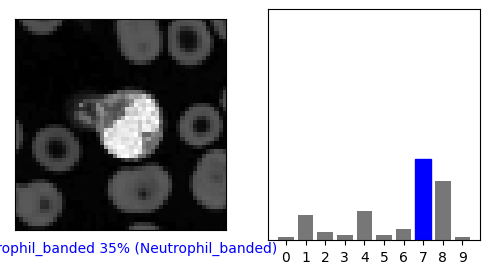

In [401]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

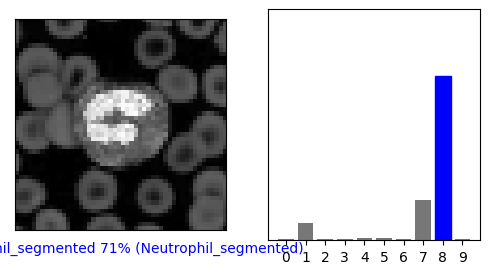

In [402]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

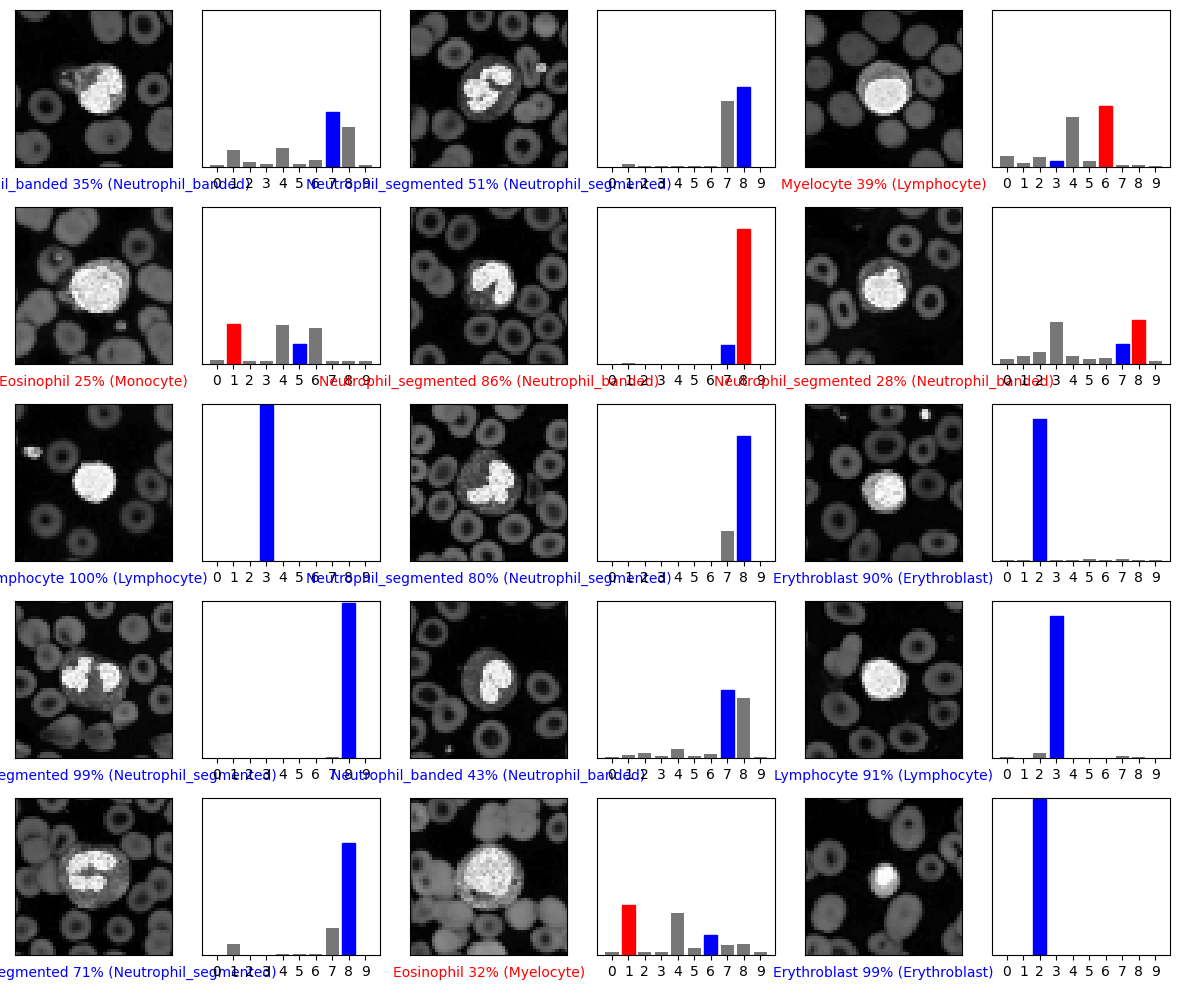

In [403]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

In [404]:
img = test_images[1]

print(img.shape)

(50, 50)


In [405]:
img = (np.expand_dims(img,0))

print(img.shape)

(1, 50, 50)


In [406]:
predictions_single = probability_model.predict(img)

print(predictions_single)

1/1 [==============================] - 0s 38ms/step
[[0.00499659 0.02323038 0.00694709 0.00640075 0.00807111 0.00738151
  0.00615389 0.42209852 0.50938964 0.00533044]]


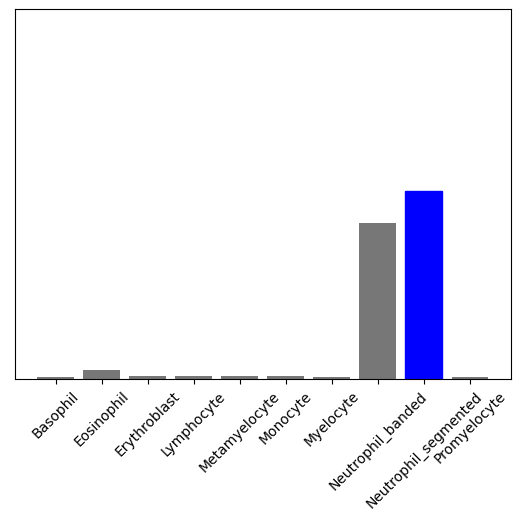

In [407]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)
plt.show()

In [408]:
np.argmax(predictions_single[0])

8

In [410]:
test_labels[1]

8